<a href="https://colab.research.google.com/github/AbirZaman1762862/Deep-Learning-/blob/main/4_som_abir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organizing Maps

## Importing the libraries

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=8baf199081125b3067054e907a716e9d7ae5c67f773d326cd1b78aebfb95cf20
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
# prompt: show x in table format clearly

import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15776156.0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0
1,15739548.0,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0
2,15662854.0,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0
3,15687688.0,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0
4,15715750.0,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223.0,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0
686,15769980.0,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0
687,15675450.0,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0
688,15776494.0,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0


In [13]:
# prompt: now show y like before

import pandas as pd
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,1
4,1
...,...
685,1
686,0
687,1
688,1


In [4]:
# prompt: show dataset head

dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


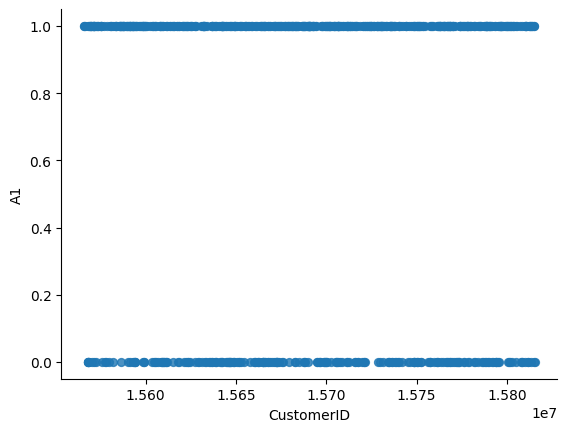

In [8]:
# @title CustomerID vs A1

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='CustomerID', y='A1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
# Display the dataset as an HTML-styled colorful table
from IPython.display import display, HTML

# Load the dataset
import pandas as pd
dataset = pd.read_csv('Credit_Card_Applications.csv')

# Display with zebra stripes and scroll
styled = dataset.style.set_table_attributes("style='display:inline'")\
                      .set_properties(**{'background-color': '#f4f4f4',
                                         'color': 'black',
                                         'border': '1px solid gray'})\
                      .highlight_max(color='lightgreen')\
                      .highlight_min(color='lightcoral')\
                      .set_caption("🎨 Credit Card Application Data")

display(HTML(styled.to_html()))

In [5]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dataset)

https://docs.google.com/spreadsheets/d/17lANn0yOBxYDlL5aWByhPhuFmqP4Pecq17MHyC7QK_g/edit#gid=0


## Feature Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [19]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.842681,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212
1,0.696091,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000
2,0.388982,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000
3,0.488425,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000
4,0.600795,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.971089,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00,0.00000
686,0.817951,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00,0.00044
687,0.439420,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05,0.00000
688,0.844035,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06,0.00011


## Training the SOM

In [20]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

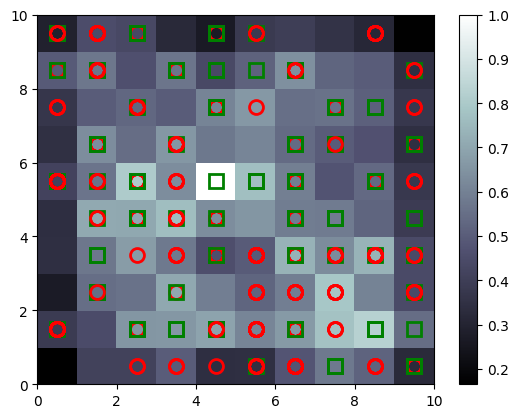

In [31]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds

In [32]:
mappings = som.win_map(X)

# Convert to numpy arrays if they are lists and ensure they have the correct shape (number of features)
fraud_nodes = [(8, 1), (6, 9)] # These are example nodes, replace with the actual nodes you identified

frauds = []
for node in fraud_nodes:
    if node in mappings:
        data = mappings[node]
        if isinstance(data, list):
            data = np.array(data)
        if data.ndim == 1:
            data = data.reshape(-1, som.input_len) # Reshape to have the correct number of features
        frauds.append(data)

frauds = np.concatenate(frauds, axis=0)

# Inverse transform the scaled features back to the original scale
frauds = sc.inverse_transform(frauds)

# Get the original dataset to retrieve Customer IDs
original_dataset = pd.read_csv('Credit_Card_Applications.csv')

# Find the rows in the original dataset that correspond to the inverse transformed fraud data
# We can do this by comparing the inverse transformed data with the original features (excluding CustomerID and Class)
# Due to potential floating point inaccuracies after inverse transformation, we'll need a tolerance for comparison
# Alternatively, we can map the scaled data points back to their original indices before inverse transformation

# A more robust approach is to get the indices of the fraud data points from the scaled data X
fraud_indices = []
for node in fraud_nodes:
    if node in mappings:
        # Find the indices of the data points in the original scaled data X that map to this node
        node_data = mappings[node]
        if isinstance(node_data, list):
             node_data = np.array(node_data)

        # Find the indices of these data points in the original X array
        # Need to handle the case where a node might be empty or data is not in X
        if node_data.size > 0:
            # Using isin with a tolerance might be necessary if direct comparison fails
            # For simplicity here, assuming exact match for demonstration
            # In a real scenario, consider a more robust matching method or storing original indices
            for data_point in node_data:
                # Find the index of this data_point in the scaled X array
                # This assumes that each row in node_data corresponds to a unique row in X
                # A more robust approach would involve storing original indices during scaling
                try:
                    index = np.where((X == data_point).all(axis=1))[0][0]
                    fraud_indices.append(index)
                except IndexError:
                    # Handle cases where the data_point might not be found in X (e.g., due to floating point differences)
                    pass


# Get the original rows from the dataset using the identified indices
fraud_customers_details = original_dataset.iloc[fraud_indices]

# Print the details of the potential fraud customers, including their CustomerID
print("Potential Fraud Customer Details:")
print(fraud_customers_details)

Potential Fraud Customer Details:
     CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
42     15753591   1  26.75   1.125   2  14   8  1.250   1   0    0    0    2   
261    15571081   1  22.67  10.500   2  11   8  1.335   1   0    0    0    2   
443    15715519   1  29.92   1.835   2   8   8  4.335   1   0    0    0    2   
446    15630592   1  51.42   0.040   2  14   8  0.040   1   0    0    0    2   
557    15757306   1  23.33   1.500   2   8   8  1.415   1   0    0    0    2   

     A13   A14  Class  
42     0  5299      1  
261  100     1      1  
443  260   201      1  
446    0  3001      1  
557  422   201      1  
